In [18]:
%matplotlib notebook
%precision 3

from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.rcParams['figure.figsize'] = [22, 10]
plt.rcParams['timezone'] = 'Europe/London'

import pandas

from datetime import datetime

In [60]:
data=pandas.read_csv("output.csv",skipinitialspace=True)
data["datetime"]=pandas.to_datetime(data["Timestamp"], unit='s')
data.set_index("datetime", inplace=True)
#documents1 = data.loc['2020-07-15 00:00:00':]
#documents1[documents1.time_total > 2]


#data["CarId"].unique()
#data[data.CarId == "https://google.com"]["time_total"]
data["time_total"].rolling(100).quantile(0.9)

datetime
2020-07-20 15:57:22         NaN
2020-07-20 15:57:22         NaN
2020-07-20 15:57:22         NaN
2020-07-20 15:57:22         NaN
2020-07-20 15:57:22         NaN
                         ...   
2020-07-21 12:36:36    8.600348
2020-07-21 12:36:36    8.742683
2020-07-21 12:36:36    8.812813
2020-07-21 12:36:36    8.971118
2020-07-21 12:36:36    8.999204
Name: time_total, Length: 15125, dtype: float64

<IPython.core.display.Javascript object>


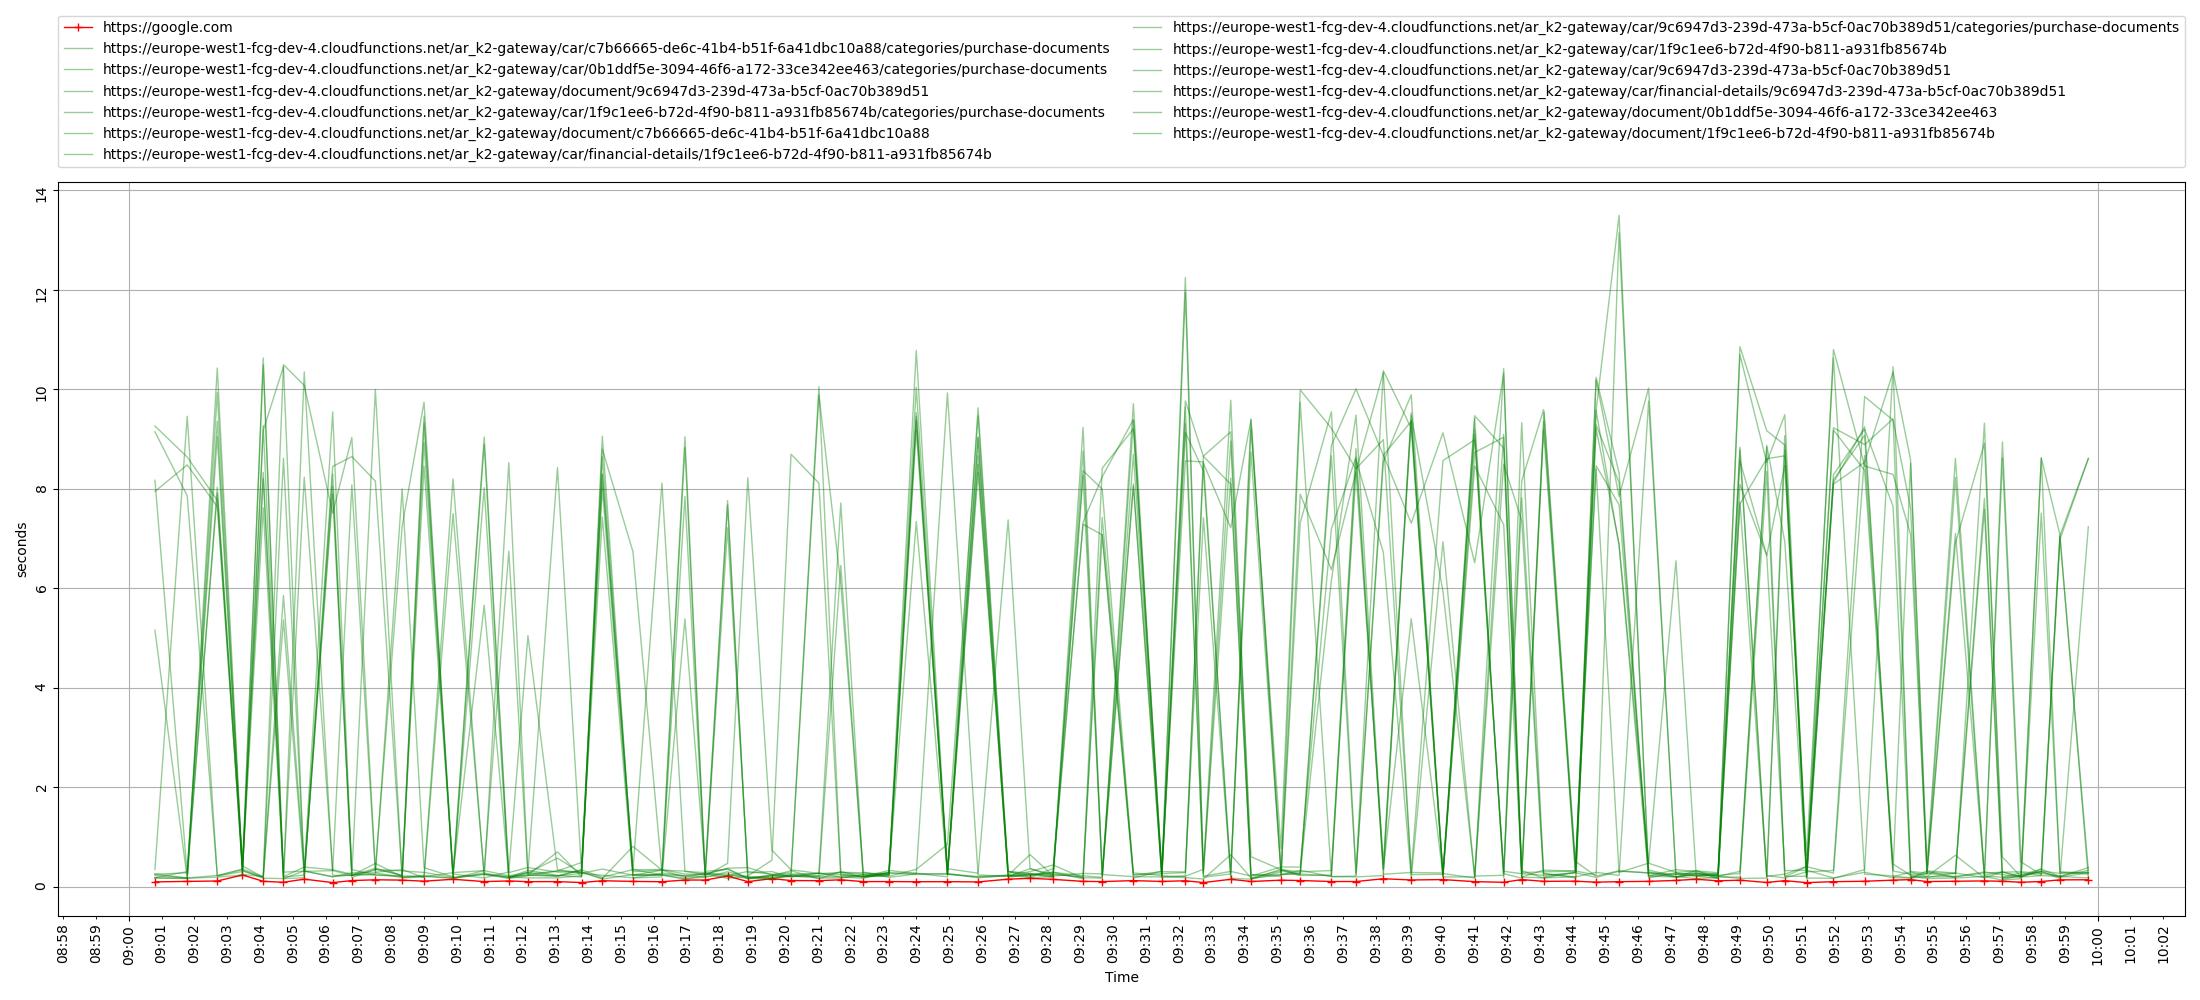

In [64]:
data=pandas.read_csv("output.csv",skipinitialspace=True)
data["datetime"]=pandas.to_datetime(data["Timestamp"], unit='s')
data.set_index("datetime", inplace=True)
data.sort_index()

# Filter out extremes that are not real
data = data.loc['2020-07-21 8:00:00':'2020-07-21 9:00:00']
data = data[data.time_total < 20]


plt.figure()
#period = "3600s"
#rolling = data["SNR1"].rolling(period).mean()
#plt.plot(rolling, label=period + " average");



urls = data["CarId"].unique()
i=0
for url in urls:
    i=i+1
    if (url == "https://google.com"):
        plt.plot(data[data.CarId == url]["time_total"], label=url, linewidth=1, color='red', marker='+')
    else:
        plt.plot(data[data.CarId == url]["time_total"], label=url, linewidth=1, color='green', alpha=0.4)
        
plt.ylabel("seconds");
plt.xlabel("Time")

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_minor_locator(mdates.MinuteLocator())

#ax.tick_params(axis='x',which='major')
ax.tick_params(which='both', rotation=90)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')



#plt.legend()
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2)
plt.tight_layout()
plt.savefig('test.png', bbox_inches='tight')